In [1]:
import gensim
import spacy
from collections import defaultdict
import pathlib
import spacy
nlp = spacy.load('en_core_web_md')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd

In [ ]:
#Link to dataset: https://www.kaggle.com/kazanova/sentiment140

In [2]:
#Load in kaggle twitter sentiment dataset for training our NB model"
df = pd.read_csv('twittertrain.csv', encoding = "ISO-8859-1")

In [3]:
#Extract the tweets from CSV
df.rename(columns={'@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D': 'tweets'}, inplace=True)
tweet_set = df['tweets'].values

In [4]:
#Extract the labels of positive = 0 or negative = 4 for each tweet
labels = df['0'].values

In [5]:
#functions to help tokenize the inputs tweets passed in and remove stopwords, punctuation, and spaces 
def keep_token(t):
    return (t.is_alpha and 
            not (t.is_space or t.is_punct or 
                 t.is_stop or t.like_num))

def lemmatize_doc(doc):
    return [t.lemma_ for t in doc if keep_token(t)]

def lower(doc):
    return [t.lower() for t in doc]

In [6]:
#This function performs the actual tokenization of each tweet from our obtained set of tweets
def tokenizer(tweet_set):
    tweet_set = [lemmatize_doc(nlp(tweet)) for tweet in tweet_set]
    tweet_set = [lower(tweet) for tweet in tweet_set]
    return tweet_set

In [7]:
#Creates dictionary representation for tweets in our lost of tweets, can filter out words based on how 
#how frequent/infrequent they are
def tweet_to_doc(tokenized_tweets_list):
    tweet_dict = Dictionary(tokenized_tweets_list)
    #tweet_dict.filter_extremes(no_below=20, no_above=0.4)
    tweet_dict.compactify()
    return tweet_dict

#Creating a bag-of-words model from all of the documents within the corpus using our dictionary representation
def bag_of_words(tweet_dict, tokenized_tweets):
    bag_of_words = [tweet_dict.doc2bow(tweet) for tweet in tokenized_tweets]
    return bag_of_words

In [8]:
#Taking 20,000 tweets from both positive and negative sentiment to feed into NB classifier (can change how many tweets
#to feed in, the more tweets to train, the longer it takes to tokenize and train)
tweet_list = tokenizer(tweet_set[0:20000])
tweet_list2 = tokenizer(tweet_set[1580000:1600000])

In [9]:
#Join each tokenized doc into one string for each doc so that word counts can be easily calculated
joined_tweets = []
tweet_list =np.concatenate((tweet_list, tweet_list2))
for tweet in tweet_list:
    joined_tweets.append(' '.join(tweet))

upset update facebook texte cry result school today blah


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [1]:
#Splitting our tweet set into testing and training datasets
labels = np.concatenate((labels[0:20000], labels[1580000:1600000]))
X_train, X_test, y_train, y_test = train_test_split(joined_tweets, labels, test_size=0.2)

NameError: name 'np' is not defined

In [11]:
#Gets the counts of words in each document (could maybe improve by reducing the number of words considered as features)
vectorizer = CountVectorizer(binary=True)
vector = vectorizer.fit_transform(X_train)
X_train = vector.toarray()

In [12]:
nb = MultinomialNB()

In [13]:
#Training the Naive Bayes Model
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.8441513797306166

In [14]:
X_test = vectorizer.transform(X_test)

#Using our NB model to now run on the portion of data we allocated as the testing set
y_pred = nb.predict(X_test)

[4 4 4 ... 4 4 0]


In [35]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

--------------------Basic Metrics--------------------
Accuracy: 74.20%

F1 Score: 73.45


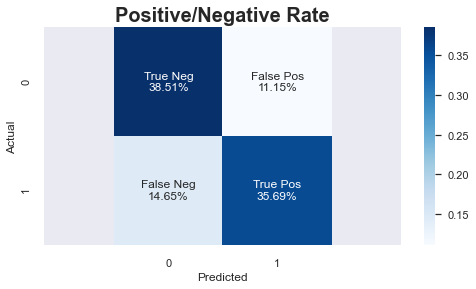

In [43]:
#Display metrics from our training with the NB Model
print('--------------------Basic Metrics--------------------')
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
y_binary_test = np.where(y_test == 4, 1, 0)
y_binary_pred = np.where(y_pred == 4, 1, 0)
print("\nF1 Score: {:.2f}".format(f1_score(y_binary_test, y_binary_pred) * 100))
confusion = confusion_matrix(y_test, y_pred)
import seaborn as sns
group_labels = ['True Neg', 'False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
new_labels = [f'{name}\n{percent}' for name, percent in
          zip(group_labels,group_percentages)]
labels = np.asarray(new_labels).reshape(2,2)
with plt.style.context('seaborn'):
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1)
    sns.heatmap(confusion/np.sum(confusion), annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.axis('equal'); plt.title('Positive/Negative Rate', fontweight='bold',fontsize=20)
    plt.show()

In [ ]:
#Code needs to be added here to now get our own tweets from Twitter and test them using our NB model